In [113]:
folder = 'C:/Users/joao/nixsync/data/analysis/190628_JC092_1P_JC/run04_retino_bandpass_bars_sf008_tf2/stimaverages_cam3/'
from glob import glob
from natsort import natsorted
from tifffile import imread
import numpy as np

files = natsorted(glob(folder+'*.tif'))

stims = [medfilt2d(imread(f)) for f in files]
stims = [s for s in stims]

In [116]:
ffts = runpar(fft_movie,stims)

<IPython.core.display.Javascript object>


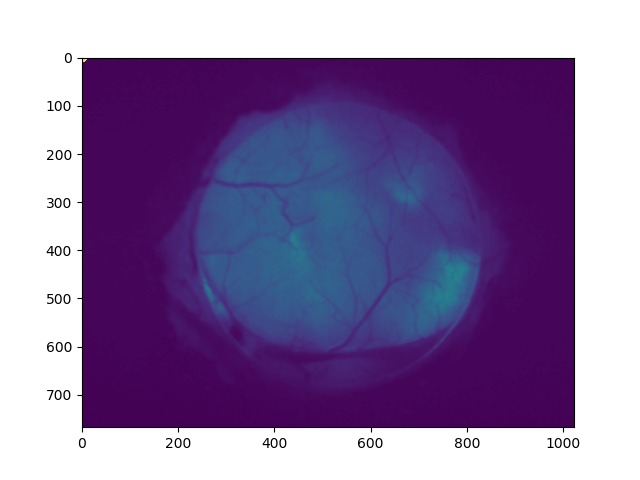

{'fig': <Figure size 640x480 with 1 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x1b20a377fd0>,
 'im': <matplotlib.image.AxesImage at 0x1b208cb9cf8>,
 'update': <function wfield.plotutils.nb_play_movie.<locals>.updateImage(change)>}

In [114]:
from wfield import *
%matplotlib notebook
nb_play_movie(stims[2])
# ffts = [fft_movie(s) for s in stims]


In [122]:
fig = plt.figure()
# fig.add_subplot(1,2,1)
# plt.imshow(ffts[1][0],cmap = 'hot',clim=[30,50])
# plt.colorbar()
fig.add_subplot(2,2,2)

from matplotlib.colors import LinearSegmentedColormap, ListedColormap

import seaborn as sns
cmap = LinearSegmentedColormap.from_list('',plt.cm.hsv(np.linspace(0,1,16)))
cmap = ListedColormap(plt.cm.hsv(np.linspace(0,1,21)))
#cmap = LinearSegmentedColormap.from_list('',plt.cm.hsv(np.linspace(0,1,10)))
tmp = ffts[2][1].copy() -  ffts[3][1].copy()
tmp[ffts[3][0]<25] = np.nan
cmap.set_bad('k')
plt.imshow(tmp,cmap = cmap,clim = [-2*np.pi,2*np.pi])
plt.colorbar(shrink=0.5)
fig.add_subplot(2,2,3)
plt.contour(tmp,np.linspace(-2*np.pi,2*np.pi,7),cmap='Blues',lw=0.5)

fig.add_subplot(2,2,1)
tmp = ffts[0][1].copy() -  ffts[1][1].copy()
tmp[ffts[3][0]<25] = np.nan
cmap.set_bad('k')
plt.imshow(tmp,cmap = cmap,clim = [-2*np.pi,2*np.pi])
plt.colorbar(shrink=0.5)
fig.add_subplot(2,2,3)
plt.contour(tmp,np.linspace(-2*np.pi,2*np.pi,7),cmap='Reds',lw=0.5)

<IPython.core.display.Javascript object>

C:\opt\conda\envs\py3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw'
  s)
C:\opt\conda\envs\py3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\opt\conda\envs\py3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


In [16]:
plt.cm.copper(np.arange(10))

array([[0.        , 0.        , 0.        , 1.        ],
       [0.00484429, 0.00306353, 0.00195098, 1.        ],
       [0.00968858, 0.00612706, 0.00390196, 1.        ],
       [0.01453287, 0.00919059, 0.00585294, 1.        ],
       [0.01937716, 0.01225412, 0.00780392, 1.        ],
       [0.02422145, 0.01531765, 0.0097549 , 1.        ],
       [0.02906574, 0.01838118, 0.01170588, 1.        ],
       [0.03391003, 0.02144471, 0.01365686, 1.        ],
       [0.03875432, 0.02450824, 0.01560784, 1.        ],
       [0.04359861, 0.02757176, 0.01755882, 1.        ]])

<IPython.core.display.Javascript object>


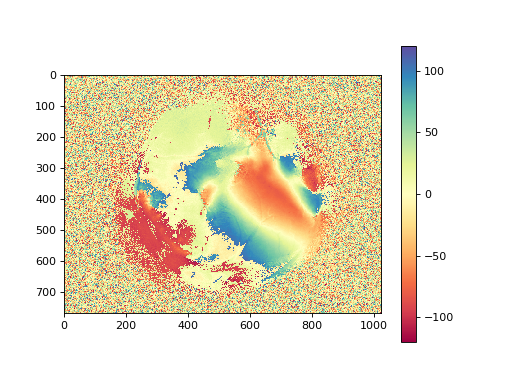

<IPython.core.display.Javascript object>


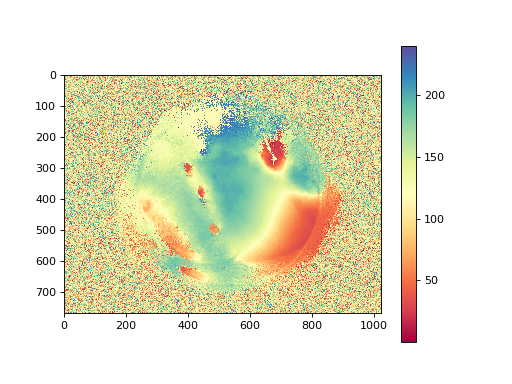

<IPython.core.display.Javascript object>

In [41]:
az0 = phasemap_to_visual_degrees(ffts[0][1]-ffts[1][1],0,120)
az1 = -1*phasemap_to_visual_degrees(ffts[2][1]-ffts[3][1],0,120)+120
plt.figure()
plt.imshow(az0,cmap = 'Spectral')
plt.colorbar()
plt.figure()
plt.imshow(az1,cmap = 'Spectral')
plt.colorbar()
plt.figure()
plt.imshow(az1+az0,cmap = 'Spectral')
plt.colorbar()

In [47]:
vsign = visual_sign_map(gaussian_filter(az0,2),gaussian_filter(az1,2))
plt.figure()
plt.imshow(vsign,cmap = 'RdBu_r')

<IPython.core.display.Javascript object>